# Topic 5: Intro to Data Analysis

Understanding and visulizing data is a central problem in the sciences and beyond.  We will begin with the very basics and we will return to discuss more advanced methods later in the course.

The starting point for most data analysis is literally reading in the data so that you can use it in python.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Here is how we open a generic text file.  We will print all the lines so you can see what the file looks line

In [2]:
f=open("data1.txt","r") # "r" means we are reading the file
for line in f:
    print(line)
f.close()

# here is some preamble

# here is some more preamble

1.0,-0.6311688938249904,0.45488424301397556,1.4166838803401072,

1.0909090909090908,0.1836650127781727,-1.2320204754180588,1.4640662255632122,

1.1818181818181819,-1.2067884002340479,-0.9383912321268246,-1.4714065565433299,

1.2727272727272727,-0.07397985995933759,1.8395768409168949,-0.0796575263423811,

1.3636363636363638,-0.737654908251103,-1.2826141566048304,2.143318426612972,

1.4545454545454546,-0.6352094090520055,1.196605783495026,-0.5272364016024303,

1.5454545454545454,-1.3478569367857853,1.2726038119049938,-0.2387464313240688,

1.6363636363636362,1.7643027277060235,-1.3358815620673254,0.42002797035543593,

1.7272727272727273,1.1228898074019433,0.4373429207381663,-0.1053287323238627,

1.8181818181818183,-1.9235573265400396,1.0784356569475517,-0.43585645156397873,

1.9090909090909092,-2.5203822814363916,0.2925419990496477,-0.7175310482674775,

2.0,-0.20414929117298058,1.8548073032642414,-1.6689147413533778,

2.09090909090909

Reading the 3rd line we see that the data is organized as time,data,data,data.  Our goal is to read in this data.  We need to do two things: (1) we also want to skip over the preamble that starts with #.  (2)we want to save the data into 4 arrays, one for the time and 3 others for the time series data. Here is how we can do it.  First, we notice there is a nice command

In [3]:
txt1='#preamble'
txt2='data'
print(txt1.startswith('#'),txt2.startswith('#'))

True False


Second we notice that we can split a string into pieces as follows:

In [4]:
string1='Welcome to UC San Diego'
string2='comma,separated,words'
print(string1.split())
print(string2.split())
print(string2.split(','))
print(string2.split(',')[2],string2.split(',')[1])

['Welcome', 'to', 'UC', 'San', 'Diego']
['comma,separated,words']
['comma', 'separated', 'words']
words separated


Using split(), we can isolate particular pieces from a given line in the file. Putting these together we can load the data as

In [5]:
t_temp=[]
l1_temp=[]
l2_temp=[]
l3_temp=[]
f=open("data1.txt","r") # "r" means we are reading the file
for line in f:
    if line.startswith('#')==False:
        spl=line.split(',')
        t_temp.append(float(spl[0]))
        l1_temp.append(float(spl[1]))
        l2_temp.append(float(spl[2]))
        l3_temp.append(float(spl[3])) 
f.close()
t=np.array(t_temp)
d1=np.array(l1_temp)
d2=np.array(l2_temp)
d3=np.array(l3_temp)

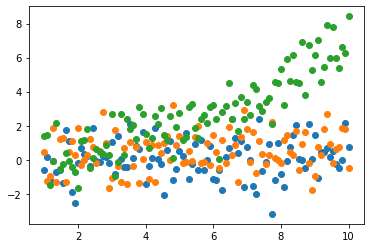

In [6]:
plt.scatter(t,d1)
plt.scatter(t,d2)
plt.scatter(t,d3)
plt.show()

We have successfully loaded our data and made a quick plot to see that it makes sense.  It certainly looks like some data, but what do we do with it?

### Signal and Noise

The central idea in most basic analyses is that our data can be thought of as the sum of two pieces 

${\rm data} = {\rm signal}+{\rm noise}$

The **signal** is typically deterministic: in this case, it is some specific function of time that we are trying to measure.

The **noise** is random: it is usually assumed to be uncorrelated between bins and drawn from a Gaussian with zero mean.  I.e. it is a random number drawn from a distribution that is added to our answer, but whose average is zero.

To see why this is important, let us assume that our signal is just a constant: ${\rm signal}(t) = S$ and our noise is drawn from a Gaussian distribution with variance $\sigma$.  Suppose our data is composed of $N$ measurements.  What we notice is that is we write

$$\sum ({\rm data}- {\rm signal}) = \sum {\rm noise}$$

The right hand side is a random walk just like we did earlier in the course. We expect that average size of the RHS is set by the RMS distance of a random walk, $\sqrt{N}\sigma$.  On the other hand $\sum {\rm signal} = N S$, so as we take more data our signal will stand out, even if $S \ll \sigma$.  

We can see how this works by simulating some data

In [7]:
def time_data(N,sigma=1,S=0.1):
    return np.ones(N)*S+np.random.randn(N)*sigma

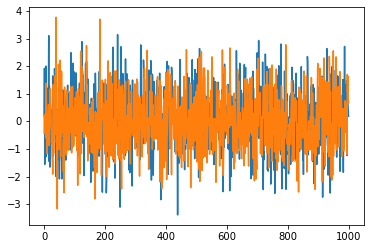

In [8]:
Sdata=time_data(1000)
noSdata=time_data(1000,S=0)
plt.plot(Sdata)
plt.plot(noSdata)

In [9]:
Sdata.sum(),noSdata.sum()

(109.04582686573795, 10.982959682653775)

We get a bigger answer for the case with $S=0.1$ even though they look identical on the time series.  Let's check this isn't an accident

In [10]:
S_list=[]
noS_list=[]
for i in range(1000):
    S_list.append(time_data(1000).sum())
    noS_list.append(time_data(1000,S=0).sum())

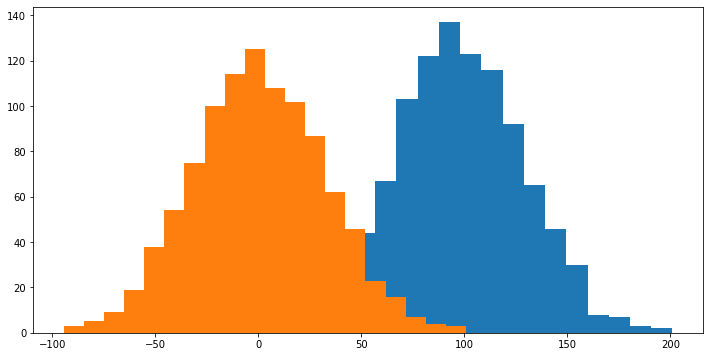

In [11]:
fig_h,ax_h=plt.subplots(figsize=(12,6))
ax_h.hist(S_list,bins=20)
ax_h.hist(noS_list,bins=20)
plt.show()

We see that there is a clear difference between the two distributions.  We can repeat it with more points to see that this difference becomes more pronounced.  If we make it 10000 data points, we should expect the $S=0.1$ distribution to move to around 1000, while the $S=0$ will be rought between -100 and 100 at 1$\sigma$.  

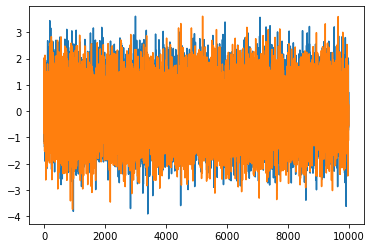

In [12]:
Sdata=time_data(10000)
noSdata=time_data(10000,S=0)
plt.plot(Sdata)
plt.plot(noSdata)

In [13]:
S_Llist=[]
noS_Llist=[]
for i in range(1000):
    S_Llist.append(time_data(10000).sum())
    noS_Llist.append(time_data(10000,S=0).sum())

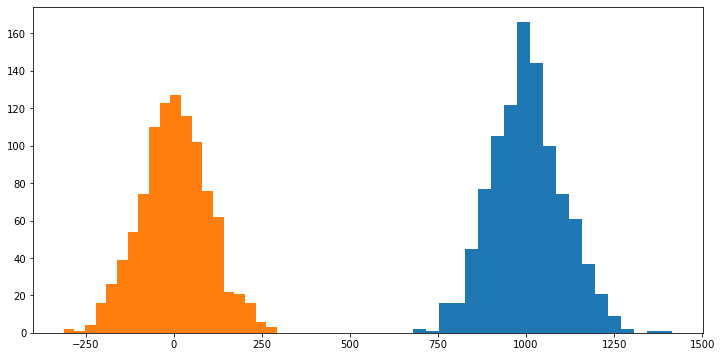

In [14]:
fig_h,ax_h=plt.subplots(figsize=(12,6))
ax_h.hist(S_Llist,bins=20)
ax_h.hist(noS_Llist,bins=20)
plt.show()

Now suppose we want to measure the value of $S$ in our data.  Suppose the true value of $S$ is $S_0$.  Let's just try to guess a value of $S$ and calculate

$ \sum ({\rm data}-S)^2 = \sum (S_0+{\rm noise} - S)^2$

Now notice that the sum over $N$ is just $N$ times the average, so as we take $N$ to be large, this is just $N$ times the statistical average.  This is useful because we know the statistical properties of the noise:

$\sum (S_0+{\rm noise} - S)^2 = N(S_0-S)^2 + N \sigma^2$

Notice that this is the sum of two positive terms and the answer is minimized when $S=S_0$.

So let's see how accurate a measure of $S$ we can make by just minimizing this quantity.  I happen to know that the noise has $\sigma=1$ so this quantity is equivalent to $\chi^2$ (otherwise it would be $\sigma^2 \times \chi^2$).

In [15]:
data_ref=time_data(10000)
def chisqr(S):
    return ((data_ref-S)**2).sum()

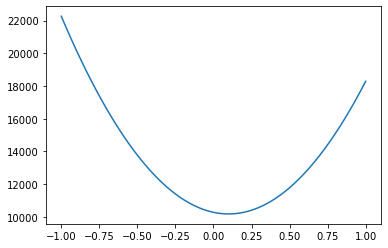

In [16]:
Srange=np.linspace(-1,1,100)
chi_out=np.zeros(len(Srange))
for i in range(len(Srange)):
    chi_out[i]=chisqr(Srange[i])
plt.plot(Srange,chi_out)

Given what we know about equation solving, we could find this minimum ourselves.  However, finding minimima or maxima rapidly becomes a hard problem, so we are going to make our life easier by using a built in minimization tool:

In [17]:
from scipy.optimize import minimize

In [18]:
minimize(chisqr,0.4)

      fun: 10180.94750038647
 hess_inv: array([[6.24579034e-05]])
      jac: array([0.00012207])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 14
      nit: 2
     njev: 7
   status: 2
  success: False
        x: array([0.09948673])

In [19]:
data_ref2=time_data(10000,S=0)
minimize(lambda x:((data_ref2-x)**2).sum(),0.4)

      fun: 10124.836917545317
 hess_inv: array([[1.81116111e-05]])
      jac: array([0.00012207])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 16
      nit: 2
     njev: 8
   status: 2
  success: False
        x: array([-0.00702006])

Minimize works more or less like our Newton solver (at this level): it takes a function and an initial point and finds a nearby point where the function is minimized (presumably where the derivative vanishes).  

Using this insight, we see that minimizing this function does a pretty good job of finding the correct value of $S$.  When we put in $S_0=0.1$ we measured $S=0.0916426$ and when we put $S_0=0$ we measured $S=0.02035976$.  In a future class, we will talk about how to give this measurements error-bars.

## Linear Regression

The natural next step is to fit a line to the data that we uploaded from a file.  This is a thing one typically does as a first guess given data that we don't totally understand: a line has enough freedom to capture some overall behavior, but is sufficiently simple that we aren't going to overfit (i.e. the function is just finding patterns in the noise). 

There are lots of build in functions that will give you a best fit line.  For example:

In [20]:
from scipy import stats
slope1, intercept1, r_value1, p_value1, std_err1 = stats.linregress(t,d1)
print(slope1, intercept1, r_value1, p_value1, std_err1)
stats.linregress(t,d1)

0.044053980142284774 -0.17318253969528752 0.10331235714633374 0.30636705556359395 0.04284396708900212


LinregressResult(slope=0.044053980142284774, intercept=-0.17318253969528752, rvalue=0.10331235714633374, pvalue=0.30636705556359395, stderr=0.04284396708900212, intercept_stderr=0.26108947495494694)

In [21]:
slope2, intercept2, r_value2, p_value2, std_err2 = stats.linregress(t,d2)
slope3, intercept3, r_value3, p_value3, std_err3 = stats.linregress(t,d3)

What most such algorithms are doing is the same as what we did above, but now where we assume that 

${\rm data} = a t + b + {\rm noise}$

where $t$ is time, $a$ and $b$ are constants.  Following what we did before, you guess that if you calculate 

$\sum ({\rm data}-a t - b)^2$

you can minimize with respect to $a$ and $b$ to find your "best fit" line.

In [22]:
minimize(lambda x:((data_ref2-x)**2).sum(),0.4)

      fun: 10124.836917545317
 hess_inv: array([[1.81116111e-05]])
      jac: array([0.00012207])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 16
      nit: 2
     njev: 8
   status: 2
  success: False
        x: array([-0.00702006])

In [23]:
minimize(lambda X:((d1-X[0]*t-X[1]*np.ones(len(t)))**2).sum(),np.array([0.1,0.1]),method='Nelder-Mead', tol=1e-6)['x']

array([ 0.04405392, -0.17318235])

In [24]:
slope1, intercept1

(0.044053980142284774, -0.17318253969528752)

In [25]:
minimize(lambda X:((d2-X[0]*t-X[1]*np.ones(len(t)))**2).sum(),np.array([0.1,0.1]),method='Nelder-Mead', tol=1e-6)['x']

array([0.06501928, 0.11842078])

In [26]:
slope2, intercept2

(0.0650193686177917, 0.11842051937262404)

In [27]:
minimize(lambda X:((d3-X[0]*t-X[1]*np.ones(len(t)))**2).sum(),np.array([0.1,0.1]),method='Nelder-Mead', tol=1e-6)['x']

array([ 0.73878142, -1.35719998])

In [28]:
slope3, intercept3

(0.7387814055506847, -1.3571997755399319)

We see that our minimization procedure is reproducing the linear regression results, pretty close to exactly.  However, this does not guarantee that we have a good fit to the data. To see how well we are doing we are going to plot the data vs the best fit line, and also a histogram of our error:

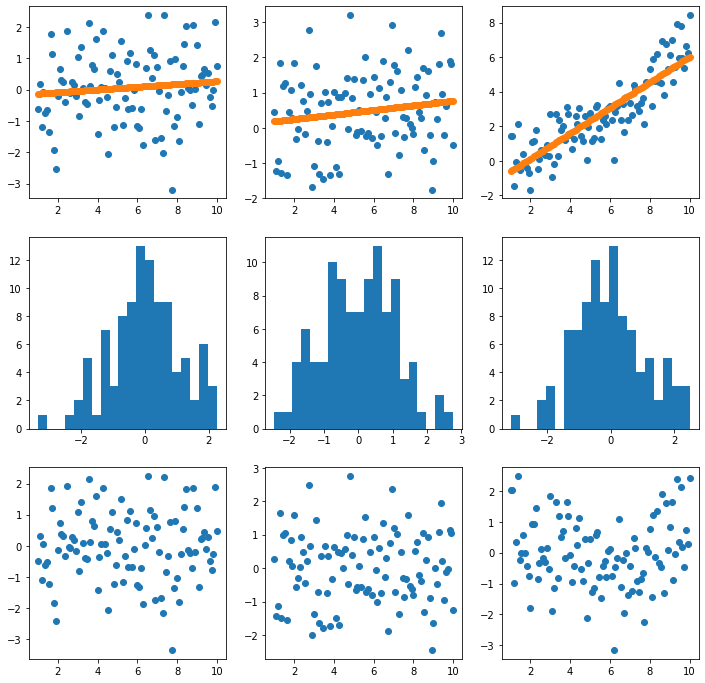

In [29]:
fig_h,ax_h=plt.subplots(figsize=(12,12),ncols=3,nrows=3)
ax_h[0,0].scatter(t,d1)
ax_h[0,0].scatter(t,slope1*t+intercept1)
ax_h[0,1].scatter(t,d2)
ax_h[0,1].scatter(t,slope2*t+intercept2)
ax_h[0,2].scatter(t,d3)
ax_h[0,2].scatter(t,slope3*t+intercept3)
ax_h[1,0].hist(d1-slope1*t-intercept1,bins=20)
ax_h[1,1].hist(d2-slope2*t-intercept2,bins=20)
ax_h[1,2].hist(d3-slope3*t-intercept3,bins=20)
ax_h[2,0].scatter(t,d1-slope1*t-intercept1)
ax_h[2,1].scatter(t,d2-slope2*t-intercept2)
ax_h[2,2].scatter(t,d3-slope3*t-intercept3)
plt.show()

These plots look pretty good.  What about the $\chi^2$ after removing the best fit line: 

In [30]:
((d1-slope1*t-intercept1)**2).sum(),((d2-slope2*t-intercept2)**2).sum(),((d3-slope3*t-intercept3)**2).sum()

(123.878341340528, 114.2267169116914, 124.2774840597678)

In [31]:
(d1**2).sum(),(d2**2).sum(),(d3**2).sum()

(125.69249389635905, 139.79811466358296, 1232.430424286052)

At first sight, everything looks fine.  Interestingly, not all the data was made with a straight line.  The first two, d1 and d2 were, but d3 was actually made with a parabola:

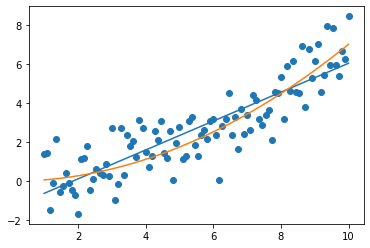

In [32]:
plt.plot(t,slope3*t+intercept3)
plt.plot(t,0.07*t**2)
plt.scatter(t,d3)

In [33]:
((d3-0.07*t**2)**2).sum()

107.98045329875646

## More general $\chi^2$ minimization

We can now see that pattern for finding a set of best fit parameters for any model given the data. Suppose with think our signal is described by a model $S(t; \vec X)$ where $\vec X$ is a list of parameters decribing the model.  Now we caculate 

$ \sum (data-S(t;\vec X))^2$

and we find the minimum in terms of the components of $X$.  

For example, we can add allow our data to be modelled by a parabola instead of just a line as follows:

In [34]:
minimize(lambda X:((d3-X[0]*t**2-X[1]*t-X[2]*np.ones(len(t)))**2).sum(),np.array([0.1,0.1,0.1]),method='Nelder-Mead', tol=1e-6)['x']

array([ 0.06909539, -0.02126793,  0.25711986])

For simple models like this one, this is a relatively straightforward minimization problem: after adding up all the data, we have quadratic polynomial in a small number of variables.  However, for more complicated models (and data) finding the minimum can be extremely difficult.

In [35]:
def model(X,n=8):
    model=np.zeros(len(t))
    for i in range(n):
        model+=X[i]*t**i
    return model
def g(X,n=8):
    return ((d3-model(X,n))**2).sum()

In [36]:
g(0.1*np.ones(8))

9831016539991.152

In [37]:
Xsol=minimize(g,0.1*np.ones(8),method='Nelder-Mead', tol=1e-6)['x']

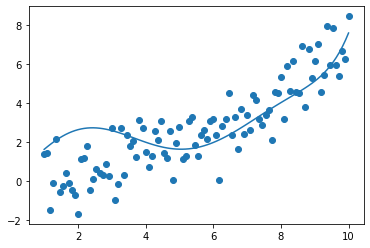

In [38]:
plt.plot(t,model(Xsol))
plt.scatter(t,d3)

In [39]:
g(Xsol)

223.83679406449997

We will see more advanced strategies for dealing with these kinds of higher dimensional problems.  We are really just scratching the surface of an enormous problem - many AI/machine learning techniques boil down to minimizing some nonlinear function of a large number of parameters.  In some cases, it is more or less obvious what it is you want to minimize and all the new ideas correspond to better or faster ways to find the minima.

### Saving Data

The final thing you might like to do is to write your own data to a file.  Sometimes you do a long calculation and you don't want to have to recaclulate it every time you want to make a figure, for example.

The most basic form of writing to a file is the opposite of what we did above

In [40]:
f=open("save_data_test.txt","w") # 'w' means writes (over the existing file), 
f.write('# here is some preamble\n')
f.write('# here is some more preamble\n')
t=np.linspace(1,10,100)
for i in range(100):
    f.write(str(t[i])+',')
    for j in range(3):
        f.write(str(np.random.randn())+',')
    f.write('\n')
f.close()

Often you may want to save something that is already in the form of an array or a python friendly object.  There are LOTS of ways to do this (pandas is a popular library with lots of options, pickle is also popular).  Hoever, the key idea is always the same: some library has a way of saving and reading a type of object that is pretty fast.  E.g. numpy has a save option:

In [41]:
outdata=np.random.randn(100)
with open('save_random.npy', 'wb') as f: # wb means write binary
    np.save(f,outdata)

In [42]:
with open('save_random.npy', 'rb') as f: # rb means read binary
    a = np.load(f)

In [43]:
a

array([-1.28351819,  0.80118616,  0.50436923,  0.55679053,  0.35804151,
        0.28079678,  0.27899045,  1.52319517,  0.57876353, -0.46995633,
       -0.40976977, -0.52971735, -0.46920524,  0.56686586,  0.2329322 ,
       -0.07007531, -0.37256433, -0.20213343, -1.92074601, -1.54198924,
        0.65032032, -0.95022917,  0.80159605,  0.15344588,  1.8805307 ,
        1.34052853,  0.99559768, -1.7528393 ,  0.74073588, -0.51275121,
       -0.42366905, -0.12894269,  0.02012575, -0.17893158,  0.57713411,
       -0.14152513, -0.80497939,  0.54856758,  1.36277873,  0.05726804,
       -0.10940295,  0.06250081, -0.86646639, -0.54975828, -1.57818899,
        0.77228486,  0.30708207,  0.86669136,  0.96556675, -0.6902134 ,
        1.62276733,  1.08186765, -0.95910534,  0.1125344 ,  1.73567757,
        0.88198646,  0.20510686, -0.84153381, -1.70091778, -1.0330982 ,
        1.93991599, -0.33994025, -0.86874819, -0.07127125,  0.55586204,
        2.91011797,  0.98326323,  0.71644968, -0.67497004,  1.41

## Summary

We have just started to scratch the surface of how do deal with data.  However, we were able to see the most basic problems in data analysis in some relatively simple form: (1) data cleaning - getting your data stored in a useful way, (2) data visulization - understanding what your data represents, (3) data analysis - separating the signal from the noise, (4) store your work for easy use in the future.